## Install required packages
If some libraries are missing, please run the following command:

In [ ]:
!pip install pandas matplotlib numpy

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

## Step 1 — Create a unified dataframe

In this step, all CSV files from different countries were concatenated into a single dataframe.  
A new column named **`country`** was added to identify the country each file belongs to.  
This step ensures that all the data is combined in a structured and consistent format for further analysis.

In [2]:
#1. Create a single dataframe with the concatenation of all input csv files, adding a column called country

# Path to dataset folder: go one level up (..) then into 'trendingYT'
data_path = os.path.join("..", "trendingYT")

# Find all CSV files that end with "videos.csv"
csv_files = glob.glob(os.path.join(data_path, "*videos.csv"))
print("Found CSV files:")
for f in csv_files:
    print(" -", f)

dfs = []

for file in csv_files:
    # Extract country code from the filename (first two letters, e.g., US, CA, DE)
    country_code = os.path.basename(file)[:2].upper()
    print(f"\nReading {file} -> country = {country_code}")
    
    # Read CSV (latin-1 encoding avoids common decoding errors)
    df = pd.read_csv(file, encoding="latin-1")
    
    # Add a new column indicating the country of the file
    df["country"] = country_code
    
    # Store the dataframe for later concatenation
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
all_videos = pd.concat(dfs, ignore_index=True)

print("\nFinal shape:", all_videos.shape)

# Display the first few rows of the final dataframe
all_videos.head()

Found CSV files:
 - ..\trendingYT\CAvideos.csv
 - ..\trendingYT\DEvideos.csv
 - ..\trendingYT\FRvideos.csv
 - ..\trendingYT\GBvideos.csv
 - ..\trendingYT\INvideos.csv
 - ..\trendingYT\JPvideos.csv
 - ..\trendingYT\KRvideos.csv
 - ..\trendingYT\MXvideos.csv
 - ..\trendingYT\RUvideos.csv
 - ..\trendingYT\USvideos.csv

Reading ..\trendingYT\CAvideos.csv -> country = CA

Reading ..\trendingYT\DEvideos.csv -> country = DE

Reading ..\trendingYT\FRvideos.csv -> country = FR

Reading ..\trendingYT\GBvideos.csv -> country = GB

Reading ..\trendingYT\INvideos.csv -> country = IN

Reading ..\trendingYT\JPvideos.csv -> country = JP

Reading ..\trendingYT\KRvideos.csv -> country = KR

Reading ..\trendingYT\MXvideos.csv -> country = MX

Reading ..\trendingYT\RUvideos.csv -> country = RU

Reading ..\trendingYT\USvideos.csv -> country = US

Final shape: (375942, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


## Dataset Overview
A quick look at the dataset structure before applying transformations.

In [3]:
all_videos.head()
all_videos.info()
all_videos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

,category_id,views,likes,dislikes,comment_count
count,375942.000000,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05
mean,20.232302,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03
std,7.132413,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02
50%,23.000000,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02
75%,24.000000,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


## Step 2 — Extract videos with no tags

The goal of this step was to identify all videos that contain *no meaningful tag information*.  
Since YouTube's dataset does not store missing tags as `NaN`, we handled cases such as:

- empty strings `""`
- whitespace-only entries
- the placeholder `"[none]"`

All such entries were collected into a separate dataframe for further inspection.

In [4]:
# Part 2 - Extract all videos that have no tag

# Some videos have no tags: tags column can be NaN, empty string, or "[none]"
no_tag_mask = (
    all_videos["tags"].isna() |                          # missing value
    all_videos["tags"].str.strip().eq("") |              # empty string
    all_videos["tags"].str.strip().eq("[none]")          # explicit [none] marker
)

# Create a new dataframe with only videos that have no tag
videos_no_tags = all_videos[no_tag_mask].copy()

print("Number of videos with no tags:", videos_no_tags.shape[0])
videos_no_tags.head()

Number of videos with no tags: 37698


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
41,JwboxqDylgg,17.14.11,Canada Soccer's Women's National Team v USA In...,Canada Soccer,17,2017-11-13T05:53:49.000Z,[none],36311,277,28,13,https://i.ytimg.com/vi/JwboxqDylgg/default.jpg,False,False,False,Canada Soccer's Women's National Team face riv...,CA
58,9B-q8h31Bpk,17.14.11,John Oliver Tackles Louis C.K. And Donald Trum...,TV Shows,22,2017-11-13T04:49:26.000Z,[none],106029,1270,101,181,https://i.ytimg.com/vi/9B-q8h31Bpk/default.jpg,False,False,False,"John Oliver on News, Politics ...",CA
78,1UE5Dq1rvUA,17.14.11,Taylor Swift Perform Ready For It - SNL,Ken Reactz,24,2017-11-12T05:18:02.000Z,[none],320964,8069,285,717,https://i.ytimg.com/vi/1UE5Dq1rvUA/default.jpg,False,False,False,Thanks for watching please subscribe and subsc...,CA
86,pmJQ4KwliX4,17.14.11,"LATEST Q POSTS: ROTHSCHILDS, HOUSE OF SAUD, lL...",James Munder,2,2017-11-12T21:25:40.000Z,[none],116820,1503,139,1066,https://i.ytimg.com/vi/pmJQ4KwliX4/default.jpg,False,False,False,https://pastebin.ca/3930472\n\nSupport My Chan...,CA
98,lHcXhBojpeQ,17.14.11,ä¸å±TVBè¦å¸ï¼ææ£10å¹´éæ¢ ç«¹é¦¬é«®å¦...,ææç¾æç,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN,CA


## Step 3 — Total number of views per channel

Here, the total number of views for each YouTube channel was computed.  
The dataframe was grouped by **`channel_title`**, and the `views` column was aggregated using the sum.  
This allows us to compare the relative popularity of channels across the dataset.

In [5]:
# Part 3 - Total number of views for each channel

# Group by channel_title and sum all views
channel_total_views = (
    all_videos.groupby("channel_title")["views"]
    .sum()
    .reset_index()
    .sort_values(by="views", ascending=False)
)

print("Number of channels:", channel_total_views.shape[0])
channel_total_views.head(10)

Number of channels: 37824


,channel_title,views
4564,ChildishGambinoVEVO,11016766510
15536,Marvel Entertainment,10430605449
17726,NickyJamTV,9479859505
18466,Ozuna,8623329509
28412,ibighit,8205572221
6689,DrakeVEVO,7637228580
2788,Bad Bunny,7124207494
2101,ArianaGrandeVevo,6202230488
28621,jypentertainment,5802822913
7047,Ed Sheeran,5775405574


## Step 4 — Excluded dataframe and data cleaning

In this step, all videos that were considered *invalid* or *incomplete* were removed from the main dataframe.  
These include videos where:

- comments are disabled  
- ratings are disabled  
- the video is marked as removed or in error  

All such rows were saved in a new dataframe named **`excluded`**, while the remaining clean data was kept in the main dataframe for further analysis.

In [6]:
# Part 4 - Build 'excluded' dataframe and remove those rows from all_videos

# Make sure boolean-like columns are properly interpreted as booleans
bool_cols = ["comments_disabled", "ratings_disabled", "video_error_or_removed"]

for col in bool_cols:
    # Convert values like "True"/"False"/"true"/"false"/"1"/"0" into real booleans
    all_videos[col] = (
        all_videos[col]
        .astype(str)               # convert to string
        .str.strip()               # remove spaces
        .str.lower()               # normalize case
        .isin(["true", "1", "yes"])  # treat these as True, all others as False
    )

# Build the mask:
# - rows where both comments and ratings are disabled
#   OR
# - rows where video_error_or_removed is True
excluded_mask = (
    (all_videos["comments_disabled"] & all_videos["ratings_disabled"]) |
    (all_videos["video_error_or_removed"])
)

# DataFrame with all excluded rows
excluded = all_videos[excluded_mask].copy()
print("Number of rows in 'excluded':", excluded.shape[0])

# Remove those rows from the main dataframe
all_videos = all_videos[~excluded_mask].copy()
print("Number of rows remaining in 'all_videos':", all_videos.shape[0])

# Quick check
excluded.head()

Number of rows in 'excluded': 2620
Number of rows remaining in 'all_videos': 373322


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
173,H8IWLEtFt9A,17.14.11,IntÃ©grale - On n'est pas couchÃ© 11 novembre ...,On n'est pas couchÃ©,24,2017-11-12T01:44:07.000Z,"onpc|""on n'est pas couche""|""laurent ruquier""|""...",122282,0,0,0,https://i.ytimg.com/vi/H8IWLEtFt9A/default.jpg,True,True,False,IntÃ©grale - On n'est pas couchÃ© 11 novembre ...,CA
1069,om-_yJaSW_Y,17.19.11,GET READY WITH US Feat: JACLYN HILL & MANNY MUA,Laura Lee,26,2017-11-18T19:24:49.000Z,"Laura88Lee|""grwm""|""chit chat get ready with me...",523258,0,0,0,https://i.ytimg.com/vi/om-_yJaSW_Y/default.jpg,True,True,False,"Hey Larlees, todays video is a get ready with ...",CA
1278,om-_yJaSW_Y,17.20.11,GET READY WITH US Feat: JACLYN HILL & MANNY MUA,Laura Lee,26,2017-11-18T19:24:49.000Z,"Laura88Lee|""grwm""|""chit chat get ready with me...",1004809,0,0,0,https://i.ytimg.com/vi/om-_yJaSW_Y/default.jpg,True,True,False,"Hey Larlees, todays video is a get ready with ...",CA
1320,faJOpxEyTWk,17.20.11,IntÃ©grale - On n'est pas couchÃ© 18 novembre ...,On n'est pas couchÃ©,24,2017-11-19T02:01:15.000Z,"onpc|""on n'est pas couche""|""laurent ruquier""|""...",87544,0,0,0,https://i.ytimg.com/vi/faJOpxEyTWk/default.jpg,True,True,False,IntÃ©grale - On n'est pas couchÃ© 18 novembre ...,CA
1573,om-_yJaSW_Y,17.21.11,GET READY WITH US Feat: JACLYN HILL & MANNY MUA,Laura Lee,26,2017-11-18T19:24:49.000Z,"Laura88Lee|""grwm""|""chit chat get ready with me...",1197269,0,0,0,https://i.ytimg.com/vi/om-_yJaSW_Y/default.jpg,True,True,False,"Hey Larlees, todays video is a get ready with ...",CA


## Step 5 — Add the like_ratio feature

A new feature named **`like_ratio`** was created to quantify engagement.  
It is defined as the ratio between likes and dislikes:

\[
\text{like_ratio} = \frac{\text{likes}}{\text{dislikes}}
\]

This metric provides a normalized way to compare video popularity beyond raw like counts.

In [7]:
# Part 5 - Add like_ratio column

# Avoid division by zero: replace 0 dislikes with NaN
all_videos["dislikes_clean"] = all_videos["dislikes"].replace(0, pd.NA)

# Compute ratio: likes / dislikes
all_videos["like_ratio"] = all_videos["likes"] / all_videos["dislikes_clean"]

# Drop helper column if you don't need it later
all_videos.drop(columns=["dislikes_clean"], inplace=True)

# Preview
all_videos[["likes", "dislikes", "like_ratio"]].head()

,likes,dislikes,like_ratio
0,787425,43420,18.135076
1,127794,1688,75.707346
2,146035,5339,27.3525
3,132239,1989,66.485168
4,1634130,21082,77.513044


## Step 6 — Cluster publish times into 10-minute intervals

The `publish_time` column was first converted into a proper datetime format.  
Then, each timestamp was rounded down to the nearest **10-minute interval** using the `floor("10min")` method.  
This prepares the data for time-based aggregation and trend analysis in the following steps.

In [8]:
# Part 6 - Cluster publish_time into 10-minute intervals

# Convert publish_time to datetime if not already
all_videos["publish_time"] = pd.to_datetime(all_videos["publish_time"], errors="coerce")

# Create a new column with times rounded down to the nearest 10 minutes
all_videos["publish_interval"] = all_videos["publish_time"].dt.floor("10min")

# Quick preview to verify
all_videos[["publish_time", "publish_interval"]].head()

,publish_time,publish_interval
0,2017-11-10 17:00:03+00:00,2017-11-10 17:00:00+00:00
1,2017-11-13 17:00:00+00:00,2017-11-13 17:00:00+00:00
2,2017-11-12 19:05:24+00:00,2017-11-12 19:00:00+00:00
3,2017-11-12 18:01:41+00:00,2017-11-12 18:00:00+00:00
4,2017-11-09 11:04:14+00:00,2017-11-09 11:00:00+00:00


## Step 7 — Interval statistics (video count, avg likes, avg dislikes)

For each 10-minute publish interval, the following metrics were computed:

- total number of videos  
- average number of likes  
- average number of dislikes  

This gives insight into how upload timing correlates with video performance.

In [9]:
# Part 7 - Statistics per 10-minute publish interval

interval_stats = (
    all_videos.groupby("publish_interval")
    .agg(
        videos_count=("video_id", "count"),
        avg_likes=("likes", "mean"),
        avg_dislikes=("dislikes", "mean")
    )
    .reset_index()
)

interval_stats.head()

,publish_interval,videos_count,avg_likes,avg_dislikes
0,2006-07-23 08:20:00+00:00,1,459.000000,152.0000
1,2007-03-05 16:20:00+00:00,9,336.666667,2.0000
2,2007-06-25 06:50:00+00:00,12,579.833333,11.5000
3,2007-12-03 20:50:00+00:00,16,187.937500,15.6875
4,2008-01-07 21:20:00+00:00,10,99.900000,2.0000


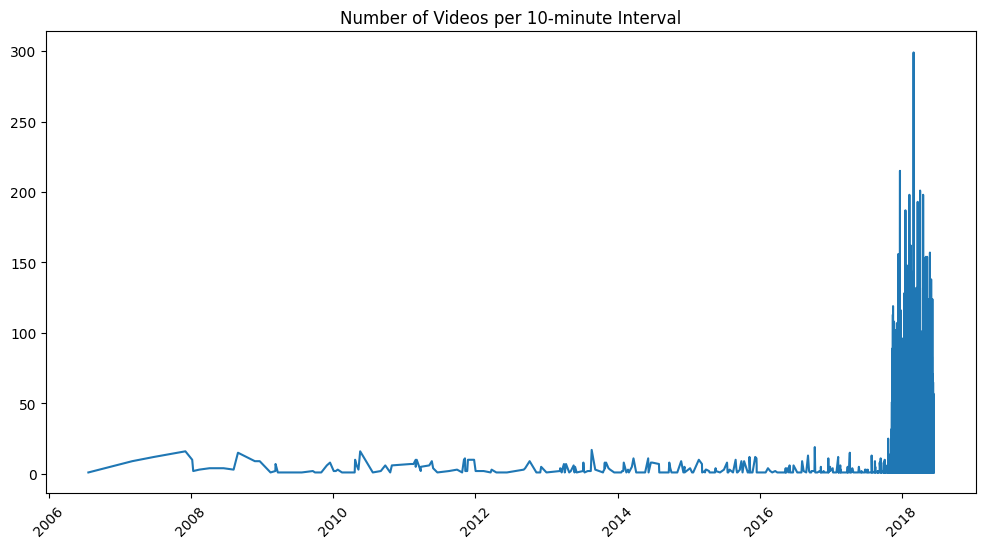

In [10]:
plt.figure(figsize=(12,6))
plt.plot(interval_stats["publish_interval"], interval_stats["videos_count"])
plt.xticks(rotation=45)
plt.title("Number of Videos per 10-minute Interval")
plt.show()

## Step 8 — Count number of videos per tag

The `tags` column contains multiple tags separated by the `|` character.  
The tags were split into lists and then **exploded** so that each tag appears in its own row.  
After cleaning empty values, the number of videos associated with each tag was counted.

In [11]:
# Part 8 - Count number of videos per tag

# Replace [none] with empty lists
all_videos["tags"] = all_videos["tags"].replace("[none]", "")

# Split tags into list
all_videos["tag_list"] = all_videos["tags"].str.split("|")

# Explode into multiple rows
tag_exploded = all_videos.explode("tag_list")

# Remove empty tags
tag_exploded = tag_exploded[tag_exploded["tag_list"].str.strip() != ""]

# Count videos per tag
tag_counts = (
    tag_exploded.groupby("tag_list")["video_id"]
    .count()
    .reset_index(name="video_count")
    .sort_values("video_count", ascending=False)
)

tag_counts.head()

,tag_list,video_count
343031,"""funny""",14933
283297,"""comedy""",11962
12772,"""2018""",11029
452294,"""news""",5955
444303,"""music""",5590


## Step 9 — Find the most frequent tags

Using the tag counts computed in Step 8, the tags with the highest number of associated videos were identified.  
This highlights the most common themes or categories across the trending dataset.

In [12]:
# Part 9 - Tags with the largest number of videos

top_tags = tag_counts.head(10)
top_tags

,tag_list,video_count
343031,"""funny""",14933
283297,"""comedy""",11962
12772,"""2018""",11029
452294,"""news""",5955
444303,"""music""",5590
11972,"""2017""",5500
571105,"""video""",5391
370425,"""humor""",5036
544832,"""television""",4160
520373,"""show""",4131


In [13]:
most_common_tag = tag_counts.iloc[0]
most_common_tag

tag_list       "funny"
video_count      14933
Name: 343031, dtype: object

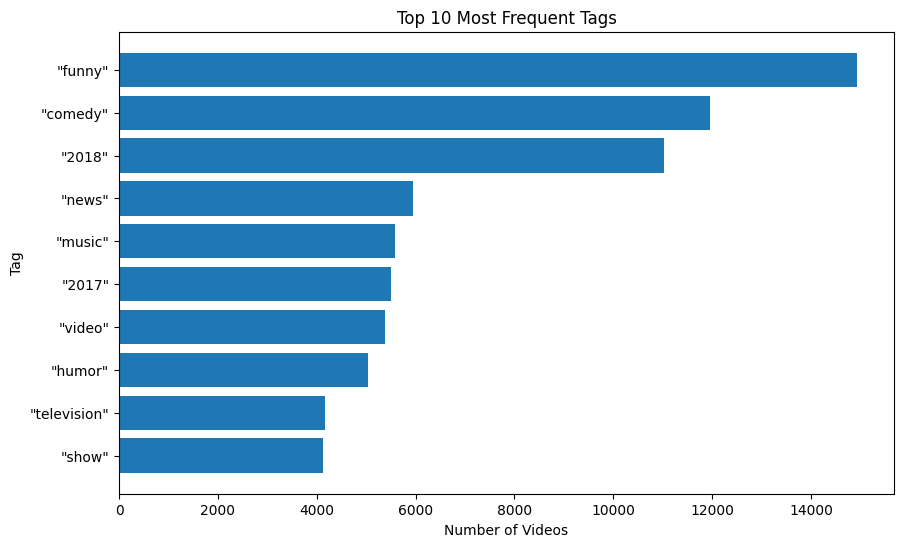

In [14]:
plt.figure(figsize=(10,6))
plt.barh(top_tags["tag_list"], top_tags["video_count"])
plt.xlabel("Number of Videos")
plt.ylabel("Tag")
plt.title("Top 10 Most Frequent Tags")
plt.gca().invert_yaxis()
plt.show()

### Interpretation
The tag **"funny"** appears as the most frequent tag, suggesting that humor-related content is highly represented in the global trending dataset.  
This aligns with the general observation that entertainment-focused content tends to trend more often.

Interestingly, several high-frequency tags belong to music and entertainment categories, indicating a strong presence of pop culture in the trending lists.

This result connects well with Step 7, where intervals with higher upload density also showed strong engagement metrics, suggesting that popular tags coincide with high-activity time periods.

## Step 10 — Average like_ratio for each (tag, country) pair

For each combination of **tag** and **country**, the average `like_ratio` was computed.  
This allows us to compare how specific tags perform in different regions, providing insights into country-specific trends and preferences.

In [15]:
# Part 10 - Average like_ratio for each (tag, country) pair

tag_country_ratio = (
    tag_exploded.groupby(["tag_list", "country"])["like_ratio"]
    .mean()
    .reset_index()
    .sort_values("like_ratio", ascending=False)
)

tag_country_ratio.head()

,tag_list,country,like_ratio
29042,"""ATT""",RU,11688.0
272465,"""U-Verse""",RU,11688.0
86282,"""Direct TV""",RU,11688.0
1067462,AT&T,RU,11688.0
200052,"""Originals""",RU,11688.0


## Conclusion

- The dataset was merged and cleaned successfully.
- Tag analysis revealed that the most common tags (e.g., “funny”, “music”) reflect global entertainment trends.
- The like_ratio metric helped identify engagement levels per tag and per country.
- Time clustering (Step 6) showed patterns in upload frequency and engagement.
- These results form a strong foundation for deeper analysis in steps 11–15.